### -Using yfinance to extract stock data from tesla 


##### Hands on lab IBM data science

In [39]:
#Importing python libraries 
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [41]:
#Ticker symbol
tesla = yf.Ticker("TSLA")

In [42]:
#Using history to extract information
tesla_data = tesla.history(period="max")

In [43]:
#Using reset_index to reset the index of the data frame (inplace=True means that we will make changes in this data frame specially )
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


### - Using requests to extract data from the tesla revenue data website

In [44]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

In [11]:
soup = BeautifulSoup (html_data , 'html5lib')

In [45]:

tables = soup.find_all('table')


In [46]:
for index,table in enumerate(tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index
print(table_index)

1


In [47]:
tesla_quarterly_revenue = []
for row in tables[table_index].tbody.find_all('tr'):
    col = row.find_all('td')
    date = col[0].text
    revenue = col[1].text
    
    tesla_quarterly_revenue.append({"Date" : date , "Revenue" : revenue})
    
tesla_revenue = pd.DataFrame(tesla_quarterly_revenue)

In [48]:
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].apply(lambda x: x.replace(',', '').replace('$', ''))


In [49]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [29]:
print(tesla_revenue[-5:])

          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


In [74]:
#Using Matplotlib because my nbformat was not working in that version
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(dataframe):
    
    dataframe_sorted = dataframe.sort_values(by='Date')
    
    plt.figure(figsize=(10, 6))
    plt.plot(dataframe_sorted['Date'], dataframe_sorted['Revenue'], marker='o', linestyle='-')
    plt.title('Tesla Quarterly Revenue')
    plt.xlabel('Date')
    plt.ylabel('Revenue ($)')
    plt.xticks(rotation=45)
    plt.tick_params(axis='y', labelsize=8)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

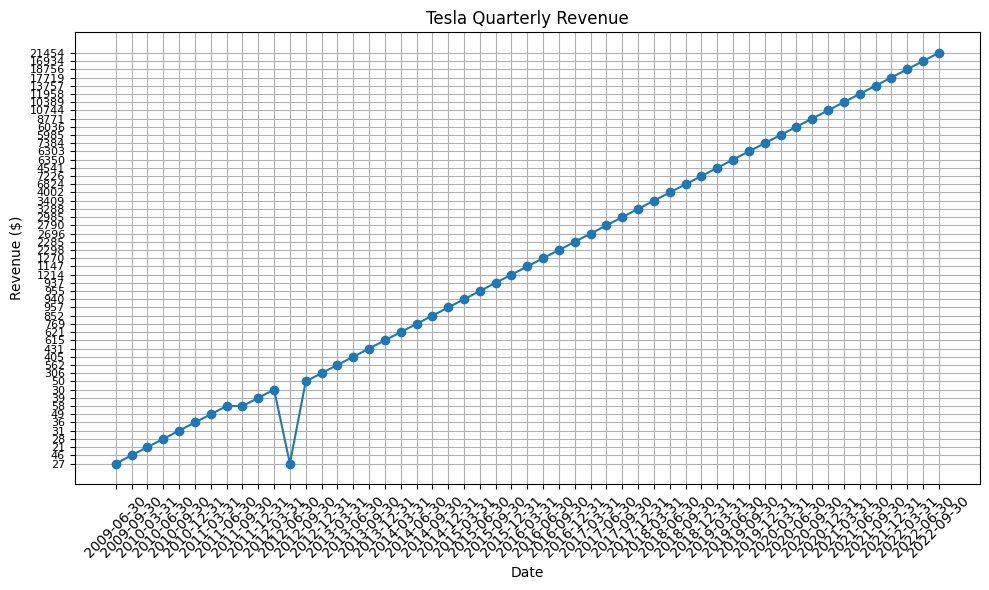

In [75]:
make_graph(tesla_revenue)